## Assignment 3 - Model - Group 28

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

**Collecting the data**

In [2]:
# Importing Dataset

data = pd.read_csv("recruitmentdataset-2022-1.3.csv")

**Describing the data**

In [3]:
# Filtering the dataset to Company A and Swimming, Golf & Football sports only

filtered_df = data[data['company']=='A']
filtered_df = filtered_df[filtered_df['sport'].str.contains('Swimming|Golf|Football', case=False)]
filtered_df.head(10)

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
7,x8767c,female,22,Dutch,Swimming,71,False,True,False,False,1,True,master,A,True
8,x6541b,female,28,Dutch,Football,65,True,False,False,True,3,False,bachelor,A,False
9,x3890b,male,24,Dutch,Football,55,True,False,False,True,3,False,master,A,True
10,x9775f,female,27,Dutch,Football,61,False,False,False,False,1,True,bachelor,A,False
11,x3562f,male,28,Dutch,Football,56,False,False,False,True,2,False,bachelor,A,True
12,x4044c,female,27,German,Football,62,False,True,False,False,1,True,bachelor,A,False
13,x9428d,male,26,Dutch,Football,56,False,False,False,False,1,False,bachelor,A,False


In [4]:
filtered_df.shape

(492, 15)

In [5]:
filtered_df.describe()

,age,ind-university_grade,ind-languages
count,492.000000,492.000000,492.000000
mean,26.247967,61.833333,1.392276
std,2.602579,5.853321,0.848253
min,21.000000,47.000000,0.000000
25%,24.000000,58.000000,1.000000
50%,26.000000,62.000000,1.000000
75%,28.000000,66.000000,2.000000
max,32.000000,77.000000,3.000000


In [6]:
sport_counts = filtered_df['sport'].value_counts()
sport_counts

Football    243
Swimming    163
Golf         86
Name: sport, dtype: int64

In [7]:
nationality_counts = filtered_df['nationality'].value_counts()
nationality_counts

Dutch      367
German      68
Belgian     57
Name: nationality, dtype: int64

In [8]:
hired_counts = filtered_df['decision'].value_counts()
hired_counts

False    277
True     215
Name: decision, dtype: int64

In [9]:
degree_counts = filtered_df['ind-degree'].value_counts()
degree_counts

bachelor    260
master      205
phd          27
Name: ind-degree, dtype: int64

In [10]:
gender_counts = filtered_df['gender'].value_counts()
gender_counts

male      267
female    217
other       8
Name: gender, dtype: int64

In [11]:
languages_counts = filtered_df['ind-languages'].value_counts()
languages_counts

1    210
2    164
0     69
3     49
Name: ind-languages, dtype: int64

**Exploring the data**

In [12]:
df = filtered_df

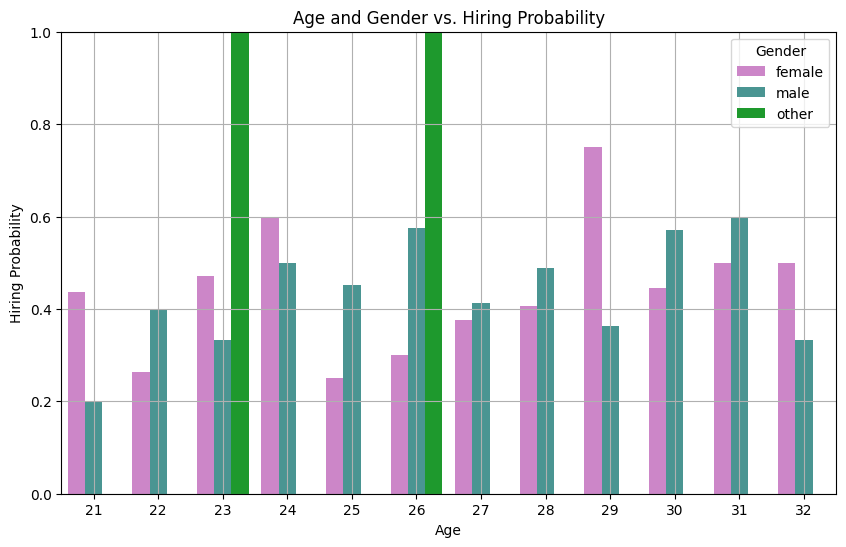

In [13]:
hired_probability = df.groupby(['age', 'gender'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = {'male': '#3EA19E', 'female': '#D87AD3', 'other': '#09AD1D'}
sns.barplot(x='age', y='decision', hue='gender', data=hired_probability, palette=custom_palette)
plt.title('Age and Gender vs. Hiring Probability')
plt.xlabel('Age')
plt.ylabel('Hiring Probability')
plt.legend(title='Gender', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

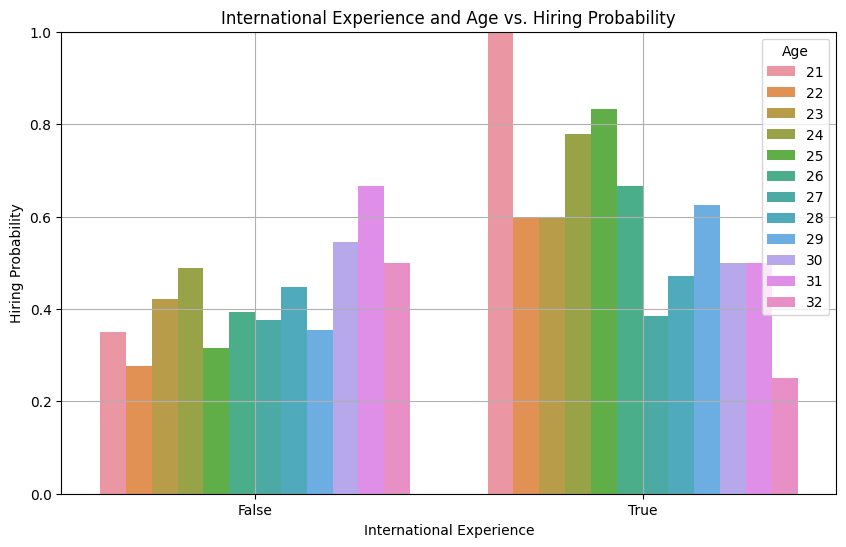

In [14]:
hired_probability = df.groupby(['ind-international_exp', 'age'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='ind-international_exp', y='decision', hue='age', data=hired_probability)
plt.title('International Experience and Age vs. Hiring Probability')
plt.xlabel('International Experience')
plt.ylabel('Hiring Probability')
plt.legend(title='Age', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

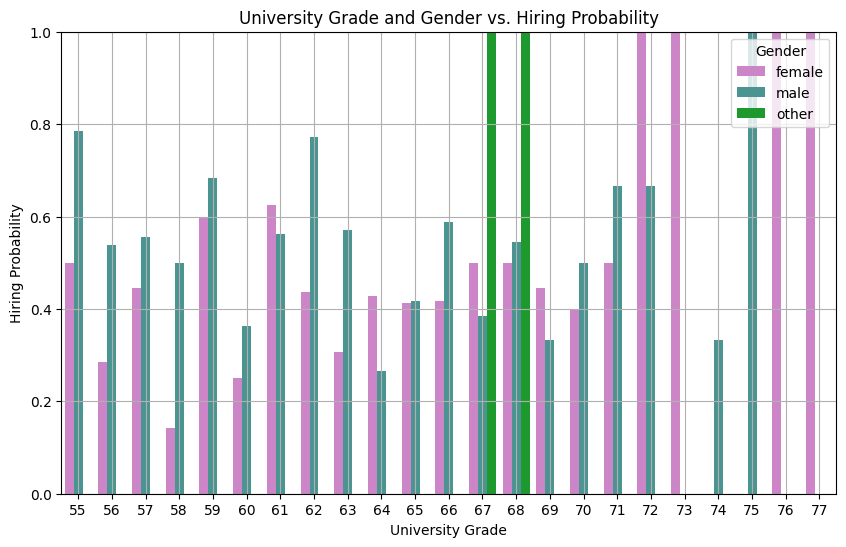

In [15]:
filtered_df1 = df[df['ind-university_grade'] >= 55]
hired_probability = filtered_df1.groupby(['ind-university_grade', 'gender'])['decision'].mean().reset_index()
custom_palette = {'male': '#3EA19E', 'female': '#D87AD3', 'other': '#09AD1D'}
plt.figure(figsize=(10, 6))
sns.barplot(x='ind-university_grade', y='decision', hue='gender', data=hired_probability, palette=custom_palette)
plt.title('University Grade and Gender vs. Hiring Probability')
plt.xlabel('University Grade')
plt.ylabel('Hiring Probability')
plt.legend(title='Gender', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

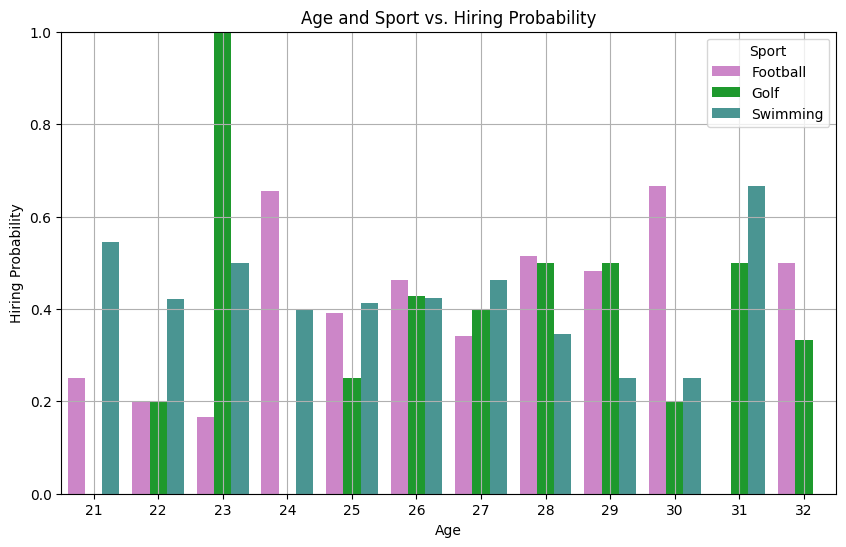

In [16]:
hired_probability = df.groupby(['age', 'sport'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = {'Swimming': '#3EA19E', 'Football': '#D87AD3', 'Golf': '#09AD1D'}
sns.barplot(x='age', y='decision', hue='sport', data=hired_probability, palette=custom_palette)
plt.title('Age and Sport vs. Hiring Probability')
plt.xlabel('Age')
plt.ylabel('Hiring Probability')
plt.legend(title='Sport', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

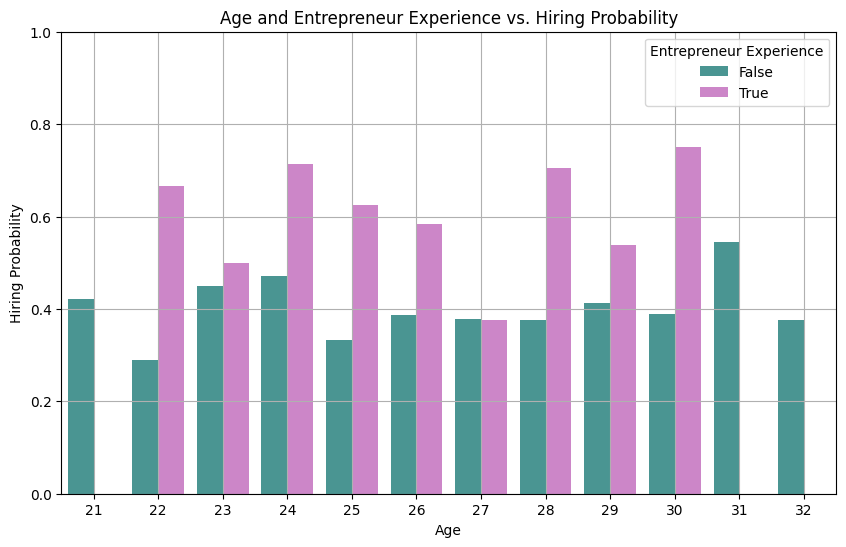

In [17]:
hired_probability = df.groupby(['age', 'ind-entrepeneur_exp'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = ['#3EA19E', '#D87AD3']
sns.barplot(x='age', y='decision', hue='ind-entrepeneur_exp', data=hired_probability, palette=custom_palette)
plt.title('Age and Entrepreneur Experience vs. Hiring Probability')
plt.xlabel('Age')
plt.ylabel('Hiring Probability')
plt.legend(title='Entrepreneur Experience', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

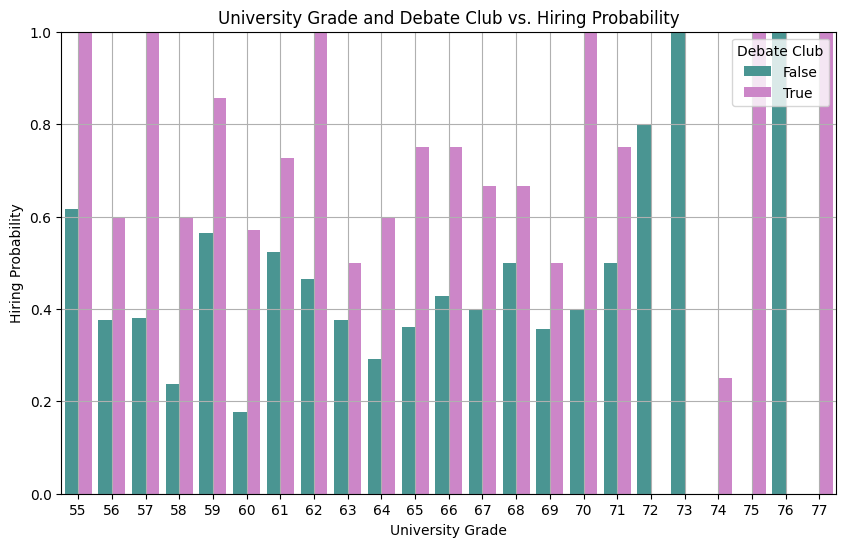

In [18]:
filtered_df1 = df[df['ind-university_grade'] >= 55]
hired_probability = filtered_df1.groupby(['ind-debateclub', 'ind-university_grade'])['decision'].mean().reset_index()
plt.figure(figsize=(10, 6))
custom_palette = ['#3EA19E', '#D87AD3']
sns.barplot(x='ind-university_grade', y='decision', hue='ind-debateclub', data=hired_probability, palette=custom_palette)
plt.title('University Grade and Debate Club vs. Hiring Probability')
plt.xlabel('University Grade')
plt.ylabel('Hiring Probability')
plt.legend(title='Debate Club', loc='upper right')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()

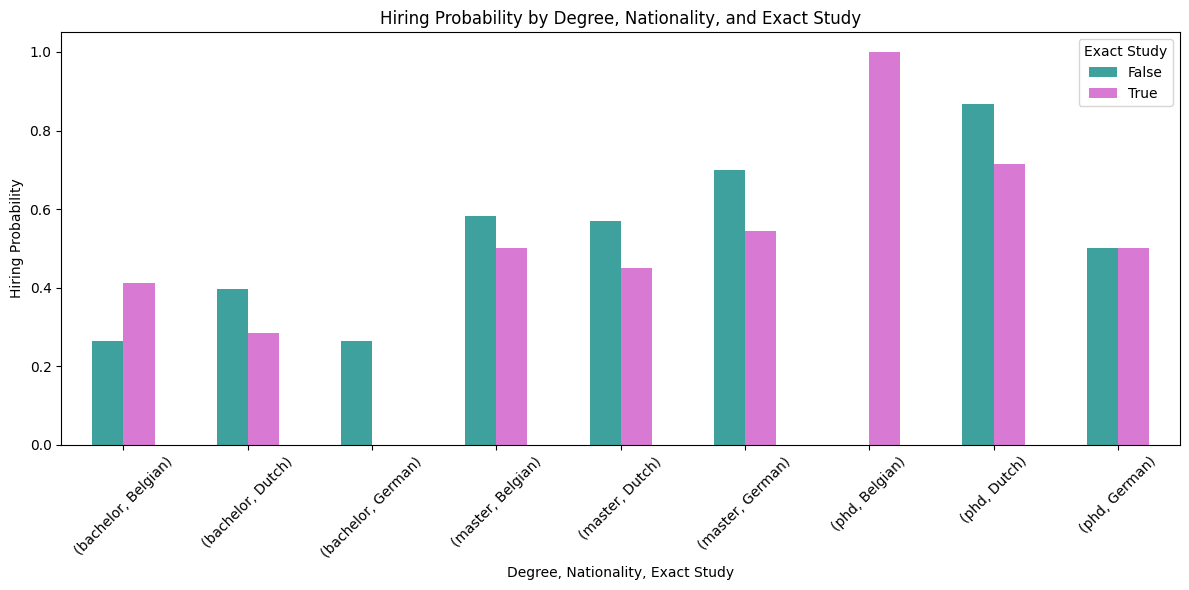

In [19]:
grouped = df.groupby(['ind-degree', 'nationality', 'ind-exact_study'])['decision'].mean().unstack()

colors = ["#3EA19E", "#D87AD3"]

fig, ax = plt.subplots(figsize=(12, 6))
grouped.plot(kind='bar', ax=ax, color=colors)
plt.xlabel('Degree, Nationality, Exact Study')
plt.ylabel('Hiring Probability')
plt.title('Hiring Probability by Degree, Nationality, and Exact Study')
plt.xticks(rotation=45)
plt.legend(title='Exact Study', labels=['False', 'True'])
plt.tight_layout()
plt.show()

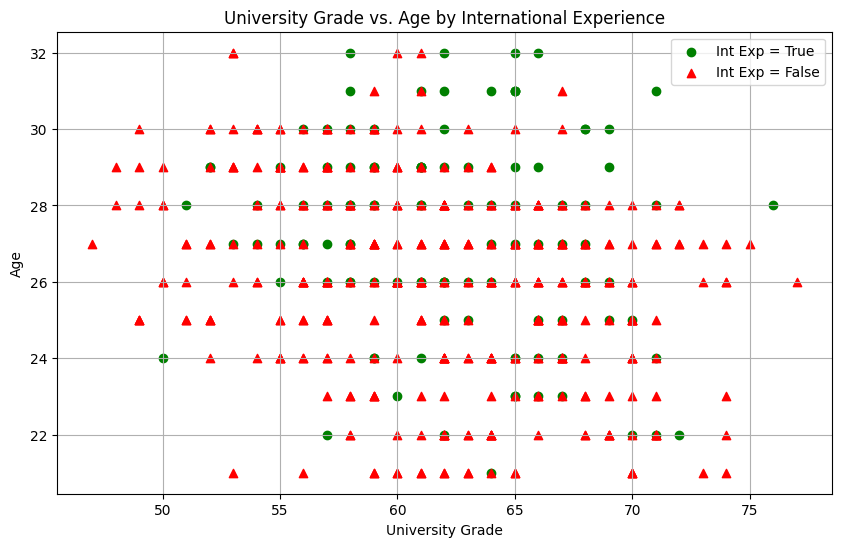

In [20]:
# Scatterplot illustrating the university grade by age distributing, marking the presence or lack of international experience. 
plt.figure(figsize=(10, 6))

# For ind-international_exp == True
plt.scatter(df[df['ind-international_exp'] == True]['ind-university_grade'],
            df[df['ind-international_exp'] == True]['age'],
            label='Int Exp = True', marker='o', color='green')

# For ind-international_exp == False
plt.scatter(df[df['ind-international_exp'] == False]['ind-university_grade'],
            df[df['ind-international_exp'] == False]['age'],
            label='Int Exp = False', marker='^', color='red')

plt.xlabel('University Grade')
plt.ylabel('Age')
plt.title('University Grade vs. Age by International Experience')
plt.legend()
plt.grid(True)

plt.show()

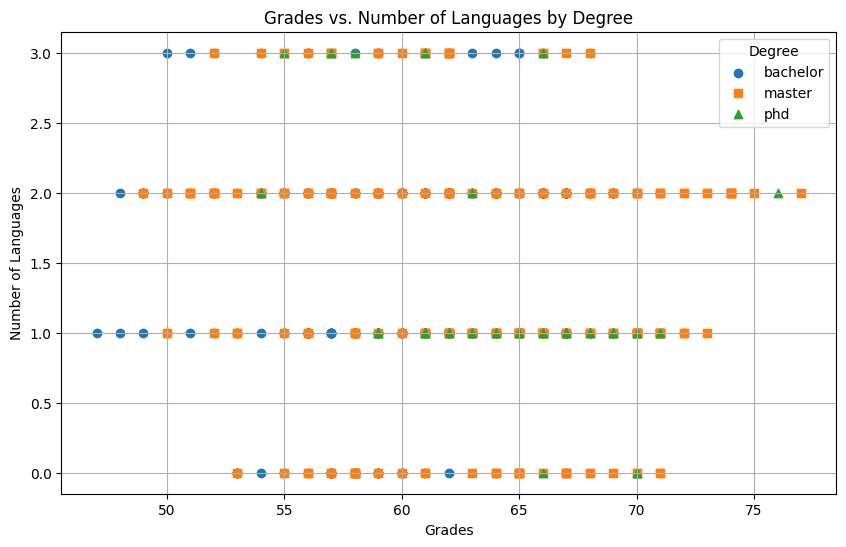

In [21]:
# Scatterplot illustrating the university grades by number of languages, marking type of degree.  
degree_markers = {
    'bachelor': 'o',
    'master': 's',
    'phd': '^'}

plt.figure(figsize=(10, 6))

for degree, marker in degree_markers.items():
    degree_data = df[df['ind-degree'] == degree]
    plt.scatter(degree_data['ind-university_grade'], degree_data['ind-languages'], label=degree, marker=marker)

plt.xlabel('Grades')
plt.ylabel('Number of Languages')
plt.title('Grades vs. Number of Languages by Degree')
plt.legend(title='Degree')
plt.grid(True)
plt.show()

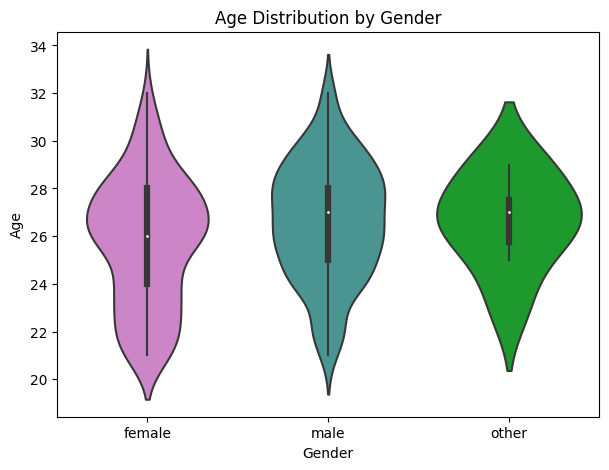

   Gender   Min Age   Max Age   Mean Age   Median Age
0  female        21        32         26           26
1    male        21        32         27           27
2   other        23        29         27           27


In [22]:
#Violin plot illustrating age distribution by gender.

plt.figure(figsize=(7, 5))
custom_palette = {'male': '#3EA19E', 'female': '#D87AD3', 'other': '#09AD1D'}
sns.violinplot(x='gender', y='age', data=df, palette=custom_palette)

plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.show()

# Table to display the results
min_max_values = df.groupby('gender')['age'].agg(['min', 'max', 'mean', 'median']).reset_index()
min_max_values['mean'] = min_max_values['mean'].round().astype(int)  # Round mean to integer
min_max_values['median'] = min_max_values['median'].astype(int)  # Ensure median is integer
min_max_table = pd.DataFrame({
    'Gender': min_max_values['gender'],
    ' Min Age': min_max_values['min'],
    ' Max Age': min_max_values['max'],
    ' Mean Age': min_max_values['mean'],
    ' Median Age': min_max_values['median']})

print(min_max_table)

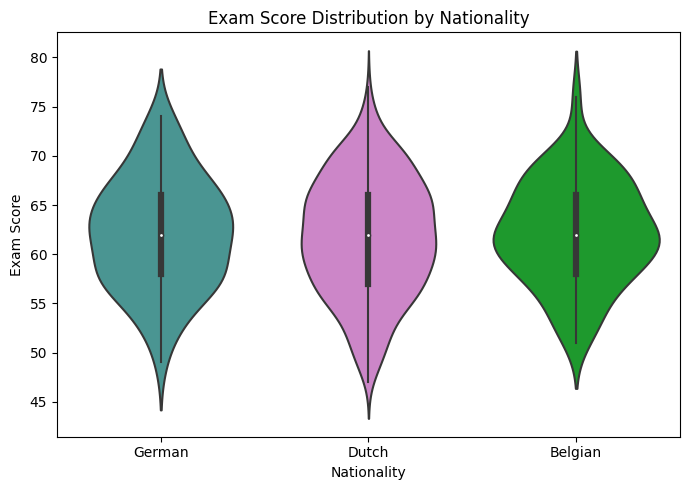

  Nationality  Minimal Score  Maximal Score  Mean Score  Median Score
0     Belgian             51             76          62          62.0
1       Dutch             47             77          62          62.0
2      German             49             74          62          62.0


In [23]:
#Violet plot showing the diversity of exam scores by nationality.
plt.figure(figsize=(7, 5))
custom_palette = {'German': '#3EA19E', 'Dutch': '#D87AD3', 'Belgian': '#09AD1D'}
sns.violinplot(x='nationality', y='ind-university_grade', data=df, palette=custom_palette)

plt.xlabel('Nationality')
plt.ylabel('Exam Score')
plt.title('Exam Score Distribution by Nationality')
plt.xticks #(rotation=45) 
plt.tight_layout()
plt.show()

# Table
min_max_values_nationality = df.groupby('nationality')['ind-university_grade'].agg(['min', 'max', 'mean', 'median']).reset_index()
min_max_values_nationality.columns = ['Nationality', 'Minimal Score', 'Maximal Score', 'Mean Score', 'Median Score']
min_max_values_nationality['Mean Score'] = min_max_values_nationality['Mean Score'].round().astype(int)  


print(min_max_values_nationality)

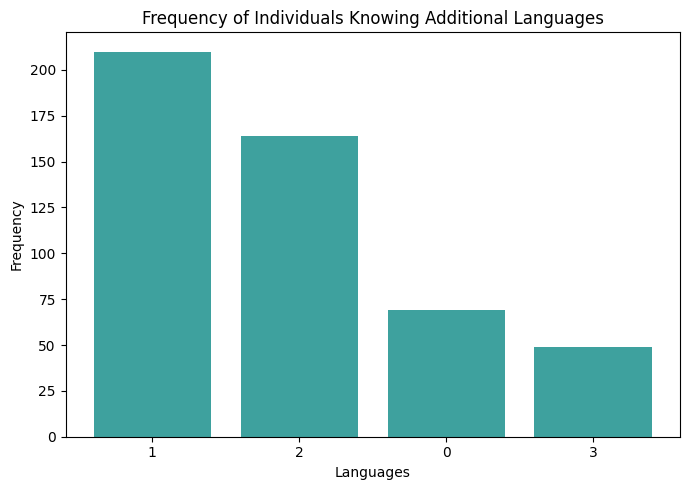

   Languages  Frequency
0          1        210
1          2        164
2          0         69
3          3         49


In [24]:
#Histogram visualizing the frequency of individuals knowing additional languages (aside from their native language)

language_counts = df['ind-languages'].value_counts()
languages = language_counts.index
frequencies = language_counts.values

plt.figure(figsize=(7, 5)) 
plt.bar(range(len(languages)), frequencies, color='#3EA19E')
plt.xticks(range(len(languages)), [int(label) for label in languages])

plt.xlabel('Languages')
plt.ylabel('Frequency')

plt.title('Frequency of Individuals Knowing Additional Languages')
plt.tight_layout() 
plt.show()

#Table:
language_table = pd.DataFrame({'Languages': languages, 'Frequency': frequencies})
print(language_table)

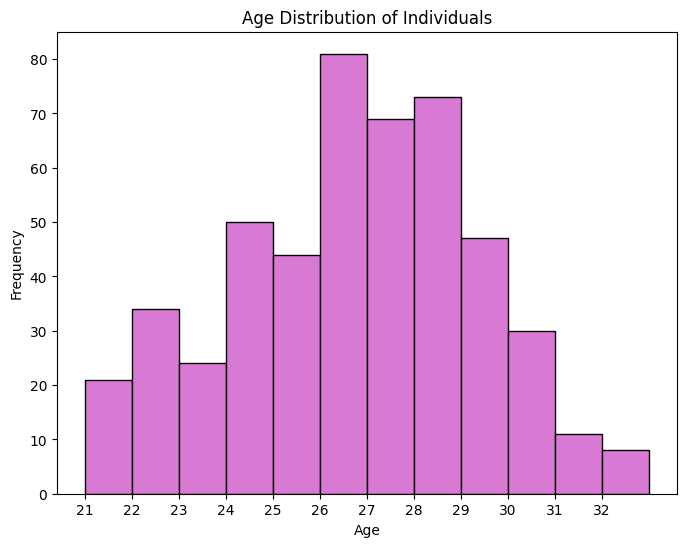

    Age  Number of people
9    21                21
6    22                34
8    23                24
3    24                50
5    25                44
0    26                81
2    27                69
1    28                73
4    29                47
7    30                30
10   31                11
11   32                 8


In [25]:
# Histogram illustating the age distribution frequency.

unique_ages = sorted(df['age'].unique())
plt.figure(figsize=(8, 6))  
age_bins = unique_ages + [unique_ages[-1] + 1]
plt.hist(df['age'], bins=age_bins, edgecolor='k', color='#D87AD3')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(unique_ages)

plt.title('Age Distribution of Individuals')
plt.show()

#Table
age_counts = df['age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Number of people']
age_counts = age_counts.sort_values(by='Age')
print(age_counts)

### Data Preparation

In [26]:
# Checking for missing values 
missing_values = df.isnull().sum()
print("Missing values count for each column:")
print(missing_values)

# Checking for duplicates
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

# Cheking for outliers
numeric_columns = df.select_dtypes(include=[int, float])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any()
print("\nOutliers:")
print(outliers)

Missing values count for each column:
Id                       0
gender                   0
age                      0
nationality              0
sport                    0
ind-university_grade     0
ind-debateclub           0
ind-programming_exp      0
ind-international_exp    0
ind-entrepeneur_exp      0
ind-languages            0
ind-exact_study          0
ind-degree               0
company                  0
decision                 0
dtype: int64
Duplicate Rows:
Empty DataFrame
Columns: [Id, gender, age, nationality, sport, ind-university_grade, ind-debateclub, ind-programming_exp, ind-international_exp, ind-entrepeneur_exp, ind-languages, ind-exact_study, ind-degree, company, decision]
Index: []

Outliers:
age                     False
ind-university_grade    False
ind-languages           False
dtype: bool


**Modelling the data**

In [27]:
# Splitting the data in train, test and validation data

df_train, df_test = skl.model_selection.train_test_split(filtered_df, test_size=0.20, random_state=9, shuffle=True)
df_train, df_val = skl.model_selection.train_test_split(df_train, test_size=0.20, random_state=9, shuffle=True)
df_train.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
548,x6445e,female,26,German,Golf,56,False,False,False,False,1,False,bachelor,A,False
613,x9736a,male,21,Dutch,Golf,64,False,True,False,True,2,True,bachelor,A,False
475,x7139e,male,32,Dutch,Golf,65,False,False,True,False,0,True,master,A,False
894,x3914e,male,30,Dutch,Football,59,False,False,False,True,2,False,bachelor,A,True
150,x8983a,female,24,Dutch,Football,64,False,False,False,False,2,True,bachelor,A,True


In [28]:
# Splitting x and y for train, test and validation data

X_train = df_train[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',	'ind-international_exp', 	'ind-languages', 'ind-exact_study',	'ind-degree', 'company']]
y_train = df_train['decision']
X_val = df_val[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',	'ind-international_exp', 	'ind-languages', 'ind-exact_study',	'ind-degree', 'company']]
y_val = df_val['decision']
X_test = df_test[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',	'ind-international_exp', 	'ind-languages', 'ind-exact_study',	'ind-degree', 'company']]
y_test = df_test['decision']

In [29]:
# Define preprocessing steps
categorical_features = ['sport', 'ind-degree', 'ind-exact_study', 'ind-debateclub', 'ind-programming_exp', 'ind-international_exp']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_features = ['ind-university_grade', 'ind-languages']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ind-university_grade',
                                                   'ind-languages']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sport', 'ind-degree',
                                                   'ind-exact_study',
                                                   'ind-debateclub',
                                                   'ind-programming_exp',
                                                   'ind-international

In [31]:
# Define hyperparameters to search
param_grid = {
    'classifier__max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'classifier__min_samples_split': [2, 5, 6, 10, 13, 15]  ,
    'classifier__min_samples_leaf': [1, 2, 4],
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_.named_steps['classifier']
print(best_classifier)

DecisionTreeClassifier(max_depth=12, min_samples_split=6)


Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.93      0.92       182
        True       0.90      0.89      0.89       132

    accuracy                           0.91       314
   macro avg       0.91      0.91      0.91       314
weighted avg       0.91      0.91      0.91       314

Precision: 0.90
Recall: 0.89
F1-score: 0.89


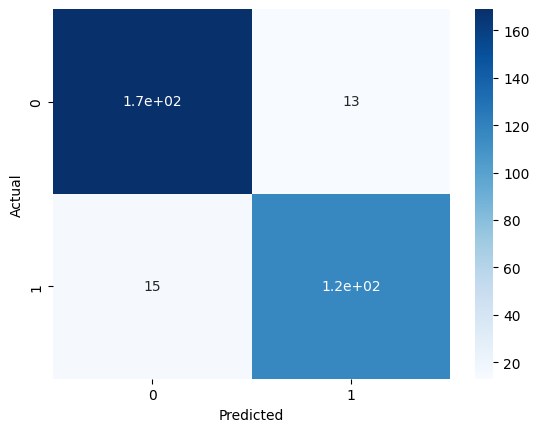

In [32]:
# Make predictions on the training set
y_pred = grid_search.predict(X_train)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_train, y_pred))

conf_matrix = confusion_matrix(y_train, y_pred)
# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.77      0.75        43
        True       0.71      0.67      0.69        36

    accuracy                           0.72        79
   macro avg       0.72      0.72      0.72        79
weighted avg       0.72      0.72      0.72        79

Precision: 0.71
Recall: 0.67
F1-score: 0.69


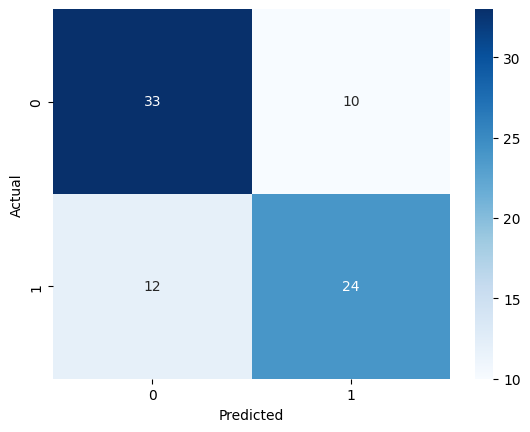

In [33]:
# Make predictions on the validation set
y_pred = grid_search.predict(X_val)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_val, y_pred))

conf_matrix = confusion_matrix(y_val, y_pred)
# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))


sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


c:\Users\Hari\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hari\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hari\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Hari\AppData\Local\Programs\Python\Python37\lib\site-packages

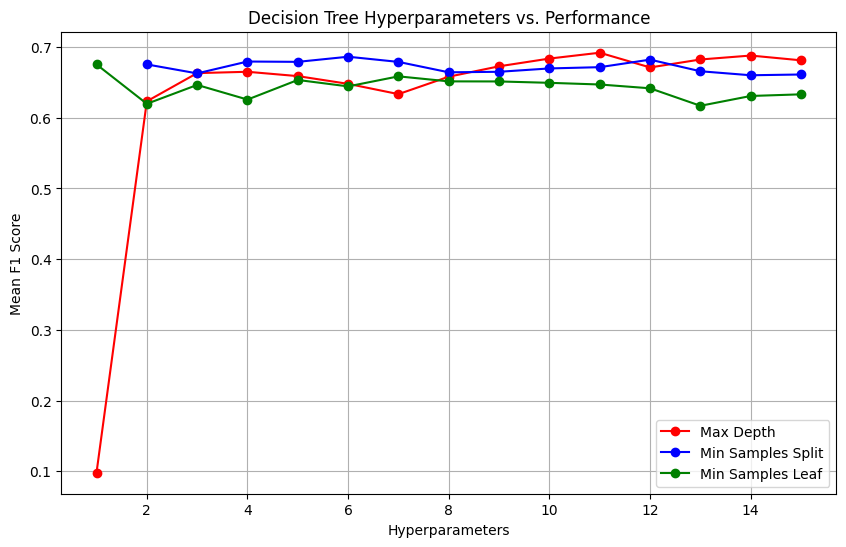

In [34]:
# Define a range of maximum depths to test
max_depths = np.arange(1, 16)  # You can adjust the range as needed
min_samples_split_values = [2, 5, 6, 10, 13, 15]  
min_samples_leaf_values = [1, 2, 4]

# Initialize lists to store mean cross-validation scores for each depth
mean_scores_depth = []

# Iterate over different maximum depths
for depth in max_depths:
    # Create a decision tree classifier with the current depth
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_depth.append(mean_score)

mean_scores_samples = []

# Iterate over different maximum depths
for depth in max_depths:
    # Create a decision tree classifier with the current depth
    classifier = DecisionTreeClassifier(min_samples_split=depth, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_samples.append(mean_score)

mean_scores_leaves = []

# Iterate over different maximum depths
for depth in max_depths:
    # Create a decision tree classifier with the current depth
    classifier = DecisionTreeClassifier(min_samples_leaf=depth, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_leaves.append(mean_score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mean_scores_depth, marker='o', linestyle='-', color='red', label='Max Depth')
plt.plot(max_depths, mean_scores_samples, marker='o', linestyle='-', color='blue', label='Min Samples Split')
plt.plot(max_depths, mean_scores_leaves, marker='o', linestyle='-', color='green', label='Min Samples Leaf')
plt.title('Decision Tree Hyperparameters vs. Performance')
plt.xlabel('Hyperparameters')
plt.ylabel('Mean F1 Score')
plt.legend()
plt.grid(True)
plt.show()

Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.75      0.74        52
        True       0.72      0.70      0.71        47

    accuracy                           0.73        99
   macro avg       0.73      0.73      0.73        99
weighted avg       0.73      0.73      0.73        99

Precision: 0.72
Recall: 0.70
F1-score: 0.71


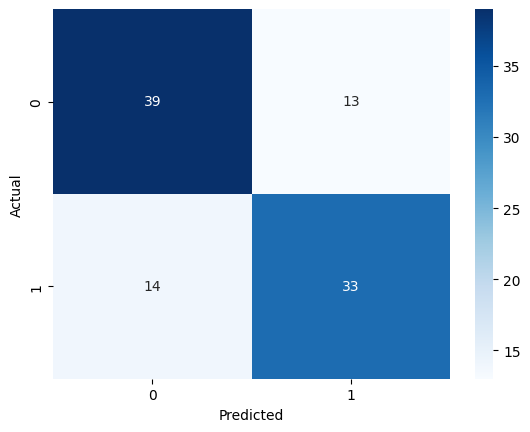

In [35]:
# Make predictions on the validation set
y_pred = grid_search.predict(X_test)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Model Exploration**

- Gender & Nationality Subgroups
- Age & Sport Subgroups

In [36]:
# Using test data

X_test["real"] = y_test
X_test["predicted"] = y_pred

C:\Users\Hari\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hari\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


*1) Model Performance Metrics Tables*

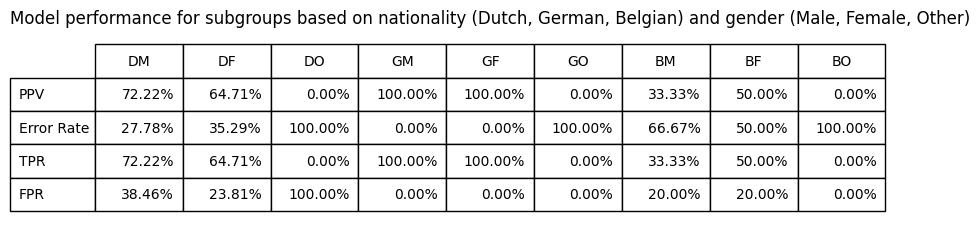

In [37]:
## Table 1: PPV, Error Rate, TPR & FPR on different subgroups (gender, nationality)


# Some things for the table

columns = ["DM", "DF", "DO", "GM", "GF", "GO", "BM", "BF", "BO"]
rows = ["PPV", "Error Rate", "TPR", "FPR"]


# Getting the data to fill in the table

data = [[],[],[],[]]
for nationality in ["Dutch", "German", "Belgian"]:
    for gender in ["male", "female", "other"]:
        # getting the subgroup
        subgroup = X_test[(X_test['nationality'] == nationality) & (X_test['gender'] == gender)]
        # PPV = Positive Prediction Rate
        if len(subgroup[subgroup["real"] == True]) == 0:
            PPV = 0.0
        else:
            PPV = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == True)]) / len(subgroup[subgroup["real"] == True])
        PPV *= 100
        data[0].append(PPV)
        # Error Rate = 100 - PPV
        data[1].append(100 - PPV)
        # TPR = True Positive Rate
        TP = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == True)])
        FN = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == False)])
        TPR = 0.0 if TP + FN == 0 else TP / (TP + FN)
        TPR *= 100
        data[2].append(TPR)
        # FPR = False Positive Rate
        FP = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == True)])
        TN = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == False)])
        FPR = 0.0 if FP + TN == 0 else FP / (FP + TN)
        FPR *= 100
        data[3].append(FPR)

        
# Formatting the data matrix

formatted = []
for row in data:
    formatted.append([f'{x:.2f}%' for x in row])

    
# The Table

plt.figure(figsize = [6.8, 2.5])
table = plt.table(cellText = formatted, rowLabels = rows, colLabels = columns, loc = 'center')
table.scale(1.5, 2)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.title("Model performance for subgroups based on nationality (Dutch, German, Belgian) and gender (Male, Female, Other)")
plt.show()

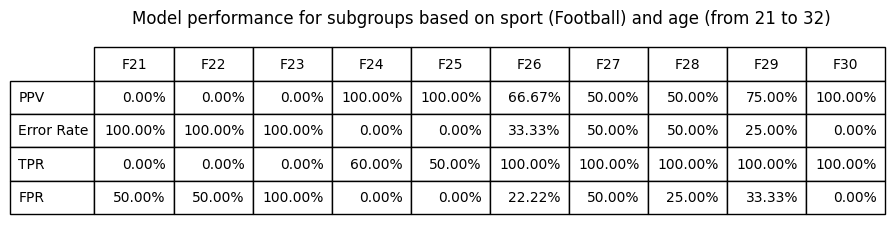

In [38]:
## Table 2: PPV, Error Rate, TPR & FPR on sport & age subgroups:
## -> 1) Football


# Some things for the table

columns = [f"F{age}" for age in range (21,33)]
rows = ["PPV", "Error Rate", "TPR", "FPR"]


# Getting the data to fill in the table

index = 0
data = [[],[],[],[]]
for age in range(21,33):
    # getting the subgroup
    subgroup = X_test[(X_test['sport'] == 'Football') & (X_test['age'] == age)]
    if len(subgroup) == 0:
        columns.pop(index)
        index -= 1
    else:
        # True/False Positives/Negatives
        TP = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == True)])
        FP = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == True)])
        FN = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == False)])
        TN = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == False)])
        # PPV = Positive Prediction Rate
        PPV = 0.0 if TP + FP == 0 else TP / (TP + FP)
        PPV *= 100
        data[0].append(PPV)
        # Error Rate = 100 - PPV
        data[1].append(100 - PPV)
        # TPR = True Positive Rate
        TPR = 0.0 if TP + FN == 0 else TP / (TP + FN)
        TPR *= 100
        data[2].append(TPR)
        # FPR = False Positive Rate
        FPR = 0.0 if FP + TN == 0 else FP / (FP + TN)
        FPR *= 100
        data[3].append(FPR)
    index += 1
        
# Formatting the data matrix

formatted = []
for row in data:
    formatted.append([f'{x:.2f}%' for x in row])

    
# The Table

plt.figure(figsize = [6.8, 2.5])
table = plt.table(cellText = formatted, rowLabels = rows, colLabels = columns, loc = 'center')
table.scale(1.5, 2)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.suptitle("Model performance for subgroups based on sport (Football) and age (from 21 to 32)")
plt.show()

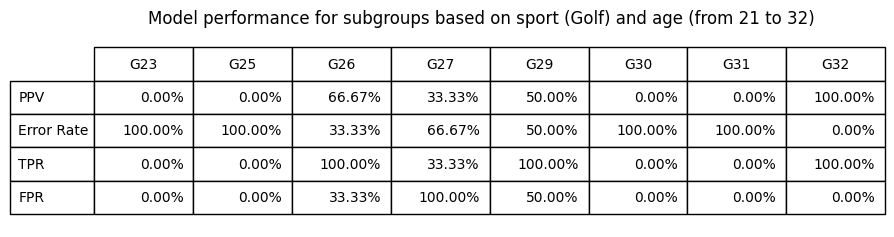

In [39]:
## Table 2: PPV, Error Rate, TPR & FPR on sport & age subgroups:
## -> 2) Golf


# Some things for the table

columns = [f"G{age}" for age in range (21,33)]
rows = ["PPV", "Error Rate", "TPR", "FPR"]


# Getting the data to fill in the table

data = [[],[],[],[]]
index = 0
for age in range(21,33):
    # getting the subgroup
    subgroup = X_test[(X_test['sport'] == 'Golf') & (X_test['age'] == age)]
    if len(subgroup) == 0:
        columns.pop(index)
        index -= 1
    else:
        # True/False Positives/Negatives
        TP = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == True)])
        FP = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == True)])
        FN = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == False)])
        TN = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == False)])
        # PPV = Positive Prediction Rate
        PPV = 0.0 if TP + FP == 0 else TP / (TP + FP)
        PPV *= 100
        data[0].append(PPV)
        # Error Rate = 100 - PPV
        data[1].append(100 - PPV)
        # TPR = True Positive Rate
        TPR = 0.0 if TP + FN == 0 else TP / (TP + FN)
        TPR *= 100
        data[2].append(TPR)
        # FPR = False Positive Rate
        FPR = 0.0 if FP + TN == 0 else FP / (FP + TN)
        FPR *= 100
        data[3].append(FPR)
    index += 1

        
# Formatting the data matrix

formatted = []
for row in data:
    formatted.append([f'{x:.2f}%' for x in row])

    
# The Table

plt.figure(figsize = [6.8, 2.5])
table = plt.table(cellText = formatted, rowLabels = rows, colLabels = columns, loc = 'center')
table.scale(1.5, 2)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.suptitle("Model performance for subgroups based on sport (Golf) and age (from 21 to 32)")
plt.show()

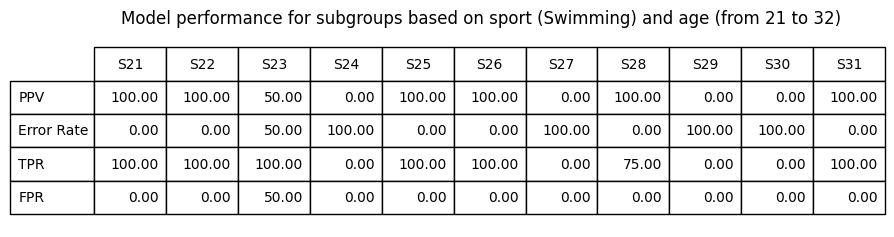

In [40]:
## Table 2: PPV, Error Rate, TPR & FPR on sport & age subgroups:
## -> 3) Swimming


# Some things for the table

columns = [f"S{age}" for age in range (21,33)]
rows = ["PPV", "Error Rate", "TPR", "FPR"]


# Getting the data to fill in the table

data = [[],[],[],[]]
index = 0
for age in range(21,33):
    # getting the subgroup
    subgroup = X_test[(X_test['sport'] == 'Swimming') & (X_test['age'] == age)]
    if len(subgroup) == 0:
        columns.pop(index)
        index -= 1
    else:
        # True/False Positives/Negatives
        TP = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == True)])
        FP = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == True)])
        FN = len(subgroup[(subgroup["real"] == True) & (subgroup["predicted"] == False)])
        TN = len(subgroup[(subgroup["real"] == False) & (subgroup["predicted"] == False)])
        # PPV = Positive Prediction Rate
        PPV = 0.0 if TP + FP == 0 else TP / (TP + FP)
        PPV *= 100
        data[0].append(PPV)
        # Error Rate = 100 - PPV
        data[1].append(100 - PPV)
        # TPR = True Positive Rate
        TPR = 0.0 if TP + FN == 0 else TP / (TP + FN)
        TPR *= 100
        data[2].append(TPR)
        # FPR = False Positive Rate
        FPR = 0.0 if FP + TN == 0 else FP / (FP + TN)
        FPR *= 100
        data[3].append(FPR)
    index += 1

        
# Formatting the data matrix

formatted = []
for row in data:
    formatted.append([f'{x:.2f}' for x in row])

    
# The Table

plt.figure(figsize = [6.8, 2.5])
table = plt.table(cellText = formatted, rowLabels = rows, colLabels = columns, loc = 'center')
table.scale(1.5, 2)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.suptitle("Model performance for subgroups based on sport (Swimming) and age (from 21 to 32)")
plt.show()

*2) Model vs Real Hiring Probability Bar Charts*

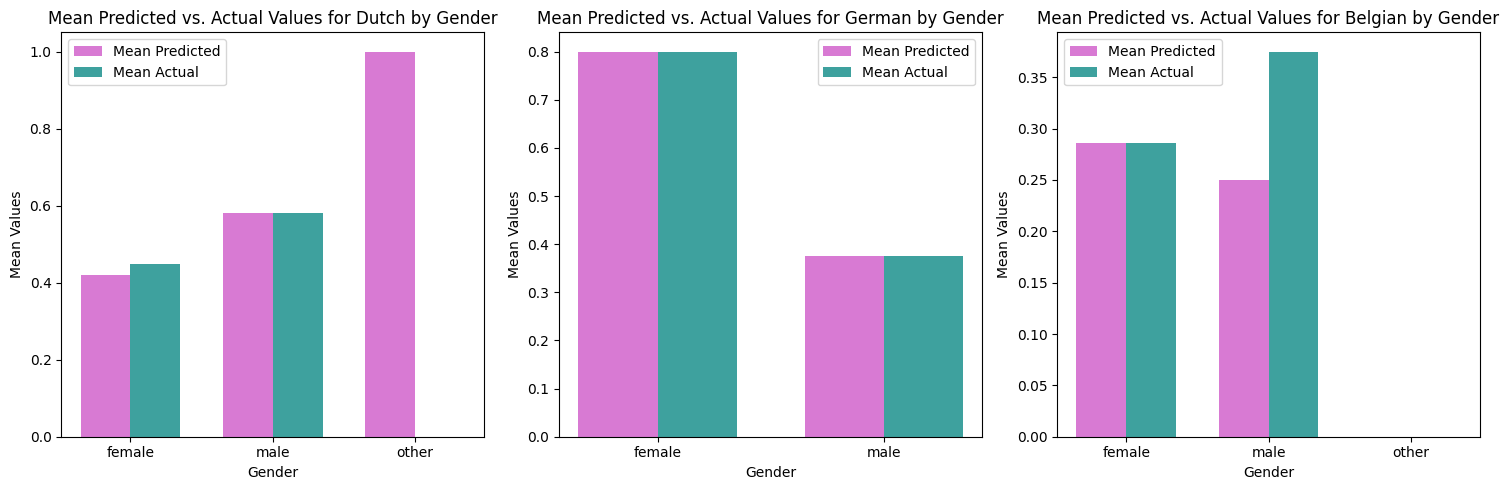

In [41]:
## Bar Chart 1: Real vs Predicted Hiring Probability of nationality & gender

# List of nationalities to plot
nationalities_to_plot = ['Dutch', 'German', 'Belgian']

# Create subplots with three columns (one for each nationality)
fig, axs = plt.subplots(1, len(nationalities_to_plot), figsize=(15, 5))

# Set the width of the bars
bar_width = 0.35

# Define colors
actual_color = '#3EA19E'
predicted_color = '#D87AD3'

# Iterate through the nationalities and create a subplot for each
for i, nationality in enumerate(nationalities_to_plot):
    # Group by gender and nationality, and calculate the mean of predicted and actual values
    predicted_mean = X_test.groupby(['gender', 'nationality'])['predicted'].mean().reset_index()
    real_mean = X_test.groupby(['gender', 'nationality'])['real'].mean().reset_index()

    # Filter data to include only the current nationality
    predicted_mean_nat = predicted_mean[predicted_mean['nationality'] == nationality]
    real_mean_nat = real_mean[real_mean['nationality'] == nationality]

    # Create an array of indices for the x-axis
    indices = range(len(predicted_mean_nat))

    # Create bars for mean predicted values with the specified color
    axs[i].bar(indices, predicted_mean_nat['predicted'], bar_width, label='Mean Predicted', color=predicted_color)

    # Create bars for mean actual values with the specified color
    axs[i].bar([idx + bar_width for idx in indices], real_mean_nat['real'], bar_width, label='Mean Actual', color=actual_color)

    # Set labels, title, and legend for the current subplot
    axs[i].set_xlabel('Gender')
    axs[i].set_ylabel('Mean Values')
    axs[i].set_title(f'Mean Predicted vs. Actual Values for {nationality} by Gender')
    axs[i].set_xticks([idx + bar_width / 2 for idx in indices])
    axs[i].set_xticklabels(predicted_mean_nat['gender'])
    axs[i].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

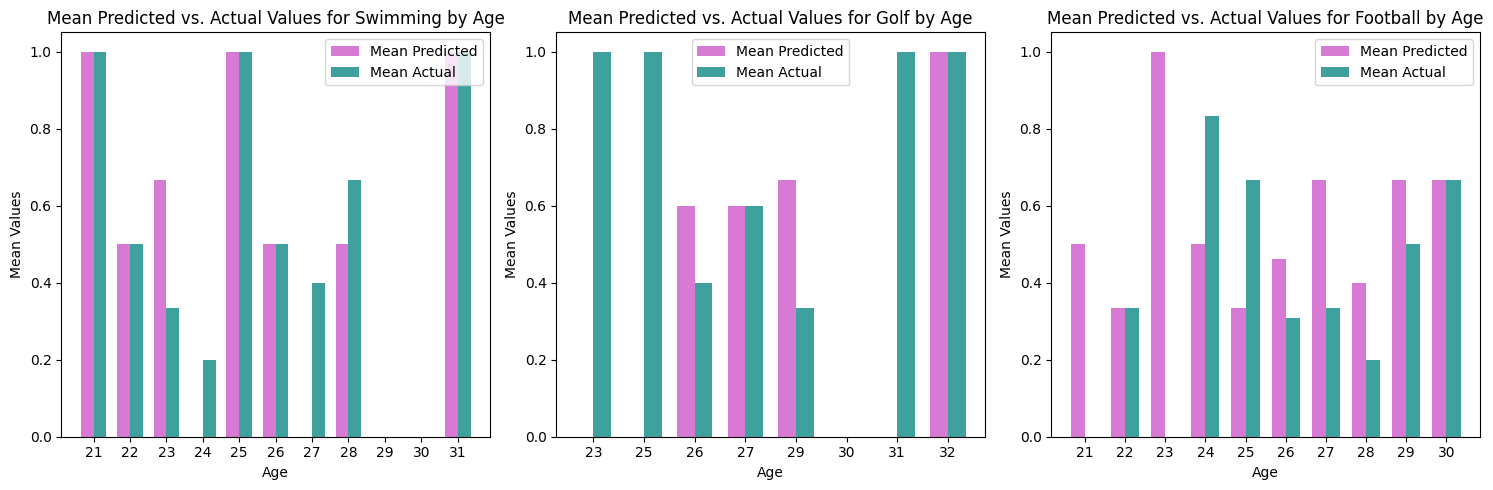

In [42]:
## Bar Chart 2: Real vs Predicted Hiring Probability of sports & age subgroups

# List of sports to plot
sports_to_plot = ['Swimming', 'Golf', 'Football']

# Create subplots with three columns (one for each sport)
fig, axs = plt.subplots(1, len(sports_to_plot), figsize=(15, 5))

# Set the width of the bars
bar_width = 0.35

# Define colors
actual_color = '#3EA19E'
predicted_color = '#D87AD3'

# Iterate through the sports and create a subplot for each
for i, sport in enumerate(sports_to_plot):
    # Group by age and sport, and calculate the mean of predicted and actual values
    predicted_mean = X_test.groupby(['age', 'sport'])['predicted'].mean().reset_index()
    real_mean = X_test.groupby(['age', 'sport'])['real'].mean().reset_index()

    # Filter data to include only the current sport
    predicted_mean_sport = predicted_mean[predicted_mean['sport'] == sport]
    real_mean_sport = real_mean[real_mean['sport'] == sport]

    # Create an array of indices for the x-axis
    indices = range(len(predicted_mean_sport))

    # Create bars for mean predicted values with the specified color
    axs[i].bar(indices, predicted_mean_sport['predicted'], bar_width, label='Mean Predicted', color=predicted_color)

    # Create bars for mean actual values with the specified color
    axs[i].bar([idx + bar_width for idx in indices], real_mean_sport['real'], bar_width, label='Mean Actual', color=actual_color)

    # Set labels, title, and legend for the current subplot
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Mean Values')
    axs[i].set_title(f'Mean Predicted vs. Actual Values for {sport} by Age')
    axs[i].set_xticks([idx + bar_width / 2 for idx in indices])
    axs[i].set_xticklabels(predicted_mean_sport['age'])
    axs[i].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()